In [4]:
## version modificada tomando que cuenta que solo se utiliza una

ALPHABET_SIZE = 256

def bm(pat, txt):
    sizeP = len(pat)
    sizeT = len(txt)
    ocurrences = []
    usesTable1 = True
    
    if sizeP + ALPHABET_SIZE < (sizeP *(sizeP + 1))/2: # los posible O-grandes para solo tener que generar una tabla el el preprocesamiento, dado a que el algoritmo usa una o la otra
        # --- 1. BAD CHARACTER TABLE ---
        bcT = []
        # This part is changed on the instrumentation section. Here we use List Comprehension.
        bcT = []
        for i in range(ALPHABET_SIZE):
            bcT.append(sizeP)
        for j in range(sizeP):
            bcT[ord(pat[j])] = sizeP - j
    else:
        # --- 0. SUFFIXES TABLE ---
        suff = [0 for i in range(sizeP)]
        suff[sizeP-1] = sizeP
        g = sizeP - 1
        f = 0
        for i in range(sizeP-2, -1, -1):
            if i > g and suff[i + sizeP - 1 - f] < i-g:
                suff[i] = suff[i + sizeP - 1 - f]
            else:
                if i < g:
                    g = i
                f = i
                while g >= 0 and pat[g] == pat[g + sizeP - 1 - f]:
                    g -= 1
                suff[i] = f-g
        # --- 2. GOOD SUFFIX TABLE ---
        gsT = []
        gsT = [sizeP for i in range(sizeP)]
        for i in range(sizeP-1, -1, -1):
            if suff[i] == i+1:
                for j in range(0, sizeP-1-i):
                    if gsT[j] == sizeP:
                        gsT[j] = sizeP - 1 - i
        for i in range(0, sizeP-1):
            gsT[sizeP-1-suff[i]] = sizeP - 1 - i
            
        usesTable1 = False
    # --- 3. SEARCH STAGE ---
    for i in range(0, sizeT-sizeP+1):
        submatch = 0
        for j in range(sizeP-1, -1, -1):
            if(pat[j] != txt[i+j]):
                break
            submatch += 1
        if submatch == sizeP:
            ocurrences.append(f"Ocurrence at index {i}!")
        else:
            if usesTable1: i += bcT[ord(txt[i+j])]
            else: gsT[j]
    return ocurrences


print(bm('aa', 'aaaa'))
# https://www-igm.univ-mlv.fr/~lecroq/string/node14.html
# https://www.cs.utexas.edu/users/moore/publications/fstrpos.pdf 
# http://pages.di.unipi.it/pisanti/DIDATTICA/patternmatching2.pdf 

['Ocurrence at index 0!', 'Ocurrence at index 1!', 'Ocurrence at index 2!']


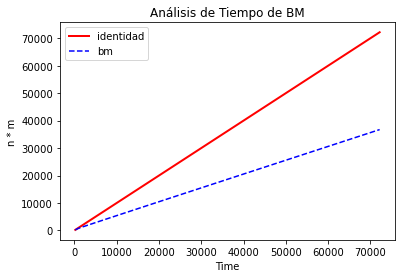

In [6]:
import matplotlib.pyplot  as plt
import numpy as np
import math as m

ALPHABET_SIZE = 256


def bm_instrumentado(pat, txt):
    sizeP = len(pat)
    sizeT = len(txt)
    ocurrences = []
    cont = 0

    if sizeP + ALPHABET_SIZE < (sizeP *(sizeP + 1))/2: # los posible O-grandes para solo tener que generar una tabla el el preprocesamiento, dado a que el algoritmo usa una o la otra
        # --- 1. BAD CHARACTER TABLE ---
        bcT = []
        # This part is changed on the instrumentation section. Here we use List Comprehension.
        bcT = []
        for i in range(ALPHABET_SIZE):
            cont += 1
            bcT.append(sizeP)
        for j in range(sizeP):
            cont += 1
            bcT[ord(pat[j])] = sizeP - j
    else:
        # --- 0. SUFFIXES TABLE ---
        suff = [0 for i in range(sizeP)]
        suff[sizeP-1] = sizeP
        g = sizeP - 1
        f = 0
        for i in range(sizeP-2, -1, -1):
            cont += 1
            if i > g and suff[i + sizeP - 1 - f] < i-g:
                suff[i] = suff[i + sizeP - 1 - f]
            else:
                if i < g:
                    g = i
                f = i
                while g >= 0 and pat[g] == pat[g + sizeP - 1 - f]:
                    cont += 1
                    g -= 1
                suff[i] = f-g
        # --- 2. GOOD SUFFIX TABLE ---
        gsT = []
        gsT = [sizeP for i in range(sizeP)]
        for i in range(sizeP-1, -1, -1):
            if suff[i] == i+1:
                for j in range(0, sizeP-1-i):
                    cont += 1
                    if gsT[j] == sizeP:
                        gsT[j] = sizeP - 1 - i
        for i in range(0, sizeP-1):
            cont += 1
            gsT[sizeP-1-suff[i]] = sizeP - 1 - i
            
        usesTable1 = False
    # --- 3. SEARCH STAGE ---
    for i in range(0, sizeT-sizeP+1):
        submatch = 0
        for j in range(sizeP-1, -1, -1):
            cont += 1
            if(pat[j] != txt[i+j]):
                break
            submatch += 1
        if submatch == sizeP:
            ocurrences.append(f"Ocurrence at index {i}!")
        else:
            if usesTable1: i += bcT[ord(txt[i+j])]
            else: gsT[j]
    return cont

def test_BM_instrumentado(start, end, inc):
    graph = []
    graph.append([])
    graph.append([])
    for i in range(start, end, inc):
        a = "aa" * i
        b = "a" * i
        graph[0] += [len(a) * len(b)]
        graph[1] += [bm_instrumentado(b, a)]
    return graph

g = test_BM_instrumentado(10, 200, 10)
tempX = list(range(10, 800, 10))
plt.plot(g[0], g[0], color="red", label="identidad", linewidth=2.0)
plt.plot(g[0], g[1],  "--", color="blue", label="bm") 
plt.legend()
plt.xlabel('Time')
plt.ylabel("n * m")
plt.title("Análisis de Tiempo de BM")
plt.show()